In [ ]:
from DS_Planck_Unet import *
import numpy as np
from tensorflow.keras.callbacks import ModelCheckpoint
import pickle

In [2]:
model = unet_planck()

In [3]:
batch_size = 20
min_rad = 1.5

In [5]:
val_gen = gen_data('/home/rt2122/Data/clusters/planck_z.csv', val_pix, batch_size, 
                   search_nside=256, min_rad=min_rad)
train_gen = gen_data('/home/rt2122/Data/clusters/planck_z.csv', train_pix, batch_size, 
                    search_nside=256, min_rad=min_rad)
test_gen = gen_data('/home/rt2122/Data/clusters/planck_z.csv', test_pix, 1, 
                   search_nside=256, min_rad=min_rad)

(1, 64, 64, 6) (1, 64, 64, 1)


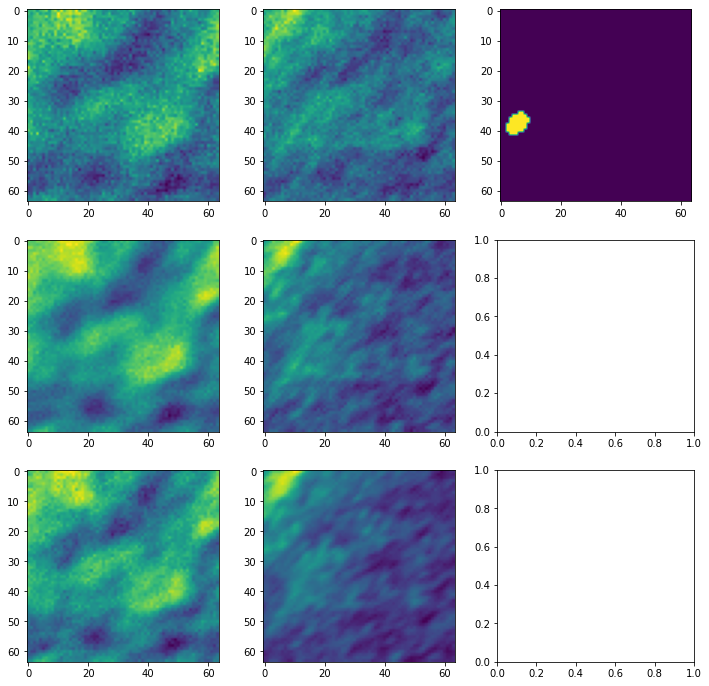

In [6]:
check_gen(test_gen)

In [7]:
filepath='/home/rt2122/Models/planck_z/f8d1.ep{epoch:04d}-vl{val_loss:.6f}-l{loss:.6f}.h5'
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min', save_weights_only=True)
callbacks_list = [checkpoint]

In [ ]:
history = model.fit_generator(generator=train_gen, steps_per_epoch=50, epochs=100, 
                    validation_data=val_gen, validation_steps=1, 
                    callbacks=callbacks_list, initial_epoch=0)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
50/50 [==============================] - ETA: 0s - loss: 0.2825 - accuracy: 0.9827 - iou: 0.0085 - dice: 0.0169 
Epoch 00001: val_loss improved from inf to 0.16258, saving model to /home/rt2122/Models/planck_z/f8d1.ep0001-vl0.162584-l0.282479.h5
50/50 [==============================] - 1053s 21s/step - loss: 0.2825 - accuracy: 0.9827 - iou: 0.0085 - dice: 0.0169 - val_loss: 0.1626 - val_accuracy: 0.9913 - val_iou: 0.0068 - val_dice: 0.0135
Epoch 2/100
50/50 [==============================] - ETA: 0s - loss: 0.1924 - accuracy: 0.9887 - iou: 0.0087 - dice: 0.0175 
Epoch 00002: val_loss improved from 0.16258 to 0.15028, saving model to /home/rt2122/Models/planck_z/f8d1.ep0002-vl0.150283-l0.192383.h5
50/50 [==============================] - 1083s 22s/step - loss: 0.1924 - accuracy: 0.9887 - iou: 0.0087 - dice: 0.0175 - val_loss: 0.1503 - val_accuracy: 0.9914 - val_iou: 0.0086 - val_dice: 0.0173
Epoch 3/

50/50 [==============================] - ETA: 0s - loss: 0.0572 - accuracy: 0.9907 - iou: 0.0174 - dice: 0.0349 
Epoch 00021: val_loss did not improve from 0.12969
50/50 [==============================] - 1142s 23s/step - loss: 0.0572 - accuracy: 0.9907 - iou: 0.0174 - dice: 0.0349 - val_loss: 0.1789 - val_accuracy: 0.9926 - val_iou: 0.0130 - val_dice: 0.0259
Epoch 22/100
50/50 [==============================] - ETA: 0s - loss: 0.0547 - accuracy: 0.9908 - iou: 0.0196 - dice: 0.0393 
Epoch 00022: val_loss did not improve from 0.12969
50/50 [==============================] - 1035s 21s/step - loss: 0.0547 - accuracy: 0.9908 - iou: 0.0196 - dice: 0.0393 - val_loss: 0.1421 - val_accuracy: 0.9906 - val_iou: 0.0169 - val_dice: 0.0339
Epoch 23/100
50/50 [==============================] - ETA: 0s - loss: 0.0569 - accuracy: 0.9905 - iou: 0.0219 - dice: 0.0438 
Epoch 00023: val_loss improved from 0.12969 to 0.12625, saving model to /home/rt2122/Models/planck_z/f8d1.ep0023-vl0.126253-l0.056875.h5


50/50 [==============================] - ETA: 0s - loss: 0.0452 - accuracy: 0.9907 - iou: 0.0439 - dice: 0.0878 
Epoch 00041: val_loss did not improve from 0.04324
50/50 [==============================] - 1040s 21s/step - loss: 0.0452 - accuracy: 0.9907 - iou: 0.0439 - dice: 0.0878 - val_loss: 0.0564 - val_accuracy: 0.9900 - val_iou: 0.0388 - val_dice: 0.0777
Epoch 42/100
50/50 [==============================] - ETA: 0s - loss: 0.0451 - accuracy: 0.9906 - iou: 0.0463 - dice: 0.0926 
Epoch 00042: val_loss improved from 0.04324 to 0.04100, saving model to /home/rt2122/Models/planck_z/f8d1.ep0042-vl0.040996-l0.045125.h5
50/50 [==============================] - 1059s 21s/step - loss: 0.0451 - accuracy: 0.9906 - iou: 0.0463 - dice: 0.0926 - val_loss: 0.0410 - val_accuracy: 0.9909 - val_iou: 0.0569 - val_dice: 0.1139
Epoch 43/100
50/50 [==============================] - ETA: 0s - loss: 0.0446 - accuracy: 0.9906 - iou: 0.0478 - dice: 0.0956 
Epoch 00043: val_loss did not improve from 0.04100


In [ ]:
check_gen(test_gen, model)

In [ ]:
with open('/home/rt2122/Models/f8d1.ep1-100.history', 'wb') as f:
    pickle.dump(history.history, f)

In [10]:
model.fit_generator(generator=train_gen, steps_per_epoch=20, epochs=110,
                    validation_data=val_gen, validation_steps=1, 
                    callbacks=callbacks_list, initial_epoch=100)

Epoch 101/110
20/20 [==============================] - ETA: 0s - loss: 0.0245 - accuracy: 0.9924 - iou: 0.2219 - dice: 0.4439 
Epoch 00101: val_loss improved from 0.01996 to 0.01819, saving model to /home/rt2122/Models/planck_z/f8d0.8.ep0101-vl0.018190-l0.024483.h5
20/20 [==============================] - 220s 11s/step - loss: 0.0245 - accuracy: 0.9924 - iou: 0.2219 - dice: 0.4439 - val_loss: 0.0182 - val_accuracy: 0.9937 - val_iou: 0.2380 - val_dice: 0.4761
Epoch 102/110
20/20 [==============================] - ETA: 0s - loss: 0.0247 - accuracy: 0.9925 - iou: 0.2397 - dice: 0.4795 
Epoch 00102: val_loss did not improve from 0.01819
20/20 [==============================] - 217s 11s/step - loss: 0.0247 - accuracy: 0.9925 - iou: 0.2397 - dice: 0.4795 - val_loss: 0.0350 - val_accuracy: 0.9886 - val_iou: 0.1993 - val_dice: 0.3988
Epoch 103/110
20/20 [==============================] - ETA: 0s - loss: 0.0235 - accuracy: 0.9929 - iou: 0.2492 - dice: 0.4984 
Epoch 00103: val_loss did not impro

(1, 64, 64, 6) (1, 64, 64, 1)


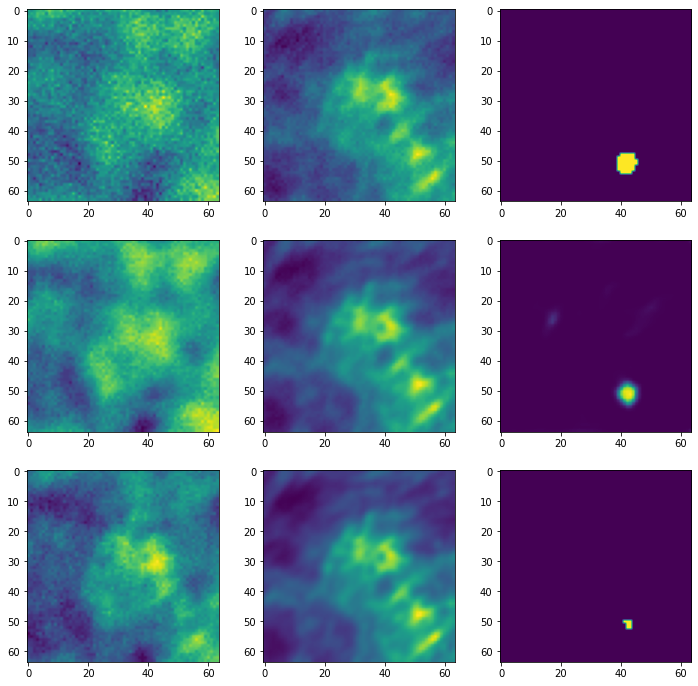

In [11]:
check_gen(test_gen, model)

In [12]:
model.fit_generator(generator=train_gen, steps_per_epoch=20, epochs=130,
                    validation_data=val_gen, validation_steps=1, 
                    callbacks=callbacks_list, initial_epoch=110)

Epoch 111/130
20/20 [==============================] - ETA: 0s - loss: 0.0245 - accuracy: 0.9924 - iou: 0.2383 - dice: 0.4766 
Epoch 00111: val_loss did not improve from 0.01819
20/20 [==============================] - 234s 12s/step - loss: 0.0245 - accuracy: 0.9924 - iou: 0.2383 - dice: 0.4766 - val_loss: 0.0226 - val_accuracy: 0.9923 - val_iou: 0.2257 - val_dice: 0.4515
Epoch 112/130
20/20 [==============================] - ETA: 0s - loss: 0.0245 - accuracy: 0.9926 - iou: 0.2387 - dice: 0.4775 
Epoch 00112: val_loss did not improve from 0.01819
20/20 [==============================] - 262s 13s/step - loss: 0.0245 - accuracy: 0.9926 - iou: 0.2387 - dice: 0.4775 - val_loss: 0.0346 - val_accuracy: 0.9898 - val_iou: 0.1920 - val_dice: 0.3840
Epoch 113/130
20/20 [==============================] - ETA: 0s - loss: 0.0230 - accuracy: 0.9929 - iou: 0.2616 - dice: 0.5232 
Epoch 00113: val_loss did not improve from 0.01819
20/20 [==============================] - 238s 12s/step - loss: 0.0230 - 

(1, 64, 64, 6) (1, 64, 64, 1)


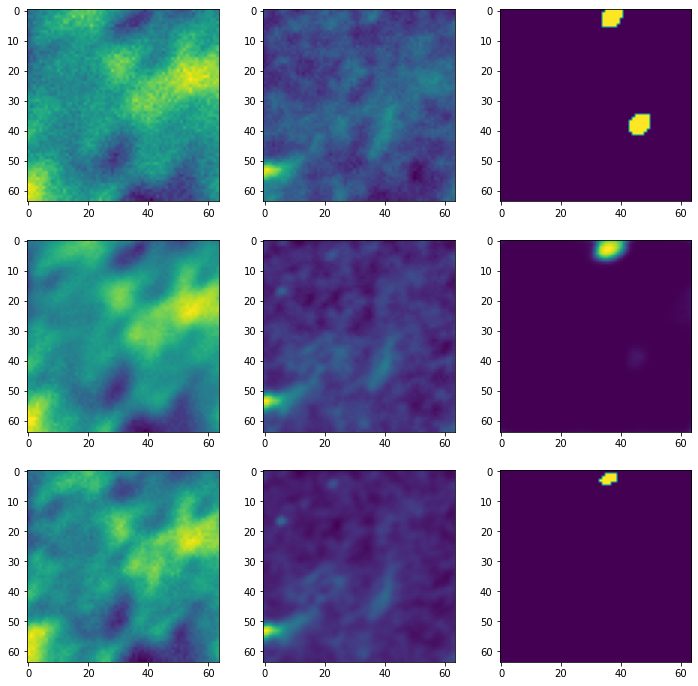

In [13]:
check_gen(test_gen, model)

In [14]:
model.fit_generator(generator=train_gen, steps_per_epoch=20, epochs=150,
                    validation_data=val_gen, validation_steps=1, 
                    callbacks=callbacks_list, initial_epoch=130)

Epoch 131/150
20/20 [==============================] - ETA: 0s - loss: 0.0256 - accuracy: 0.9922 - iou: 0.2365 - dice: 0.4731 
Epoch 00131: val_loss did not improve from 0.01704
20/20 [==============================] - 274s 14s/step - loss: 0.0256 - accuracy: 0.9922 - iou: 0.2365 - dice: 0.4731 - val_loss: 0.0208 - val_accuracy: 0.9939 - val_iou: 0.2263 - val_dice: 0.4526
Epoch 132/150
20/20 [==============================] - ETA: 0s - loss: 0.0247 - accuracy: 0.9923 - iou: 0.2375 - dice: 0.4751 
Epoch 00132: val_loss did not improve from 0.01704
20/20 [==============================] - 294s 15s/step - loss: 0.0247 - accuracy: 0.9923 - iou: 0.2375 - dice: 0.4751 - val_loss: 0.0315 - val_accuracy: 0.9894 - val_iou: 0.1996 - val_dice: 0.3993
Epoch 133/150
20/20 [==============================] - ETA: 0s - loss: 0.0242 - accuracy: 0.9926 - iou: 0.2447 - dice: 0.4895 
Epoch 00133: val_loss did not improve from 0.01704
20/20 [==============================] - 256s 13s/step - loss: 0.0242 - 

(1, 64, 64, 6) (1, 64, 64, 1)


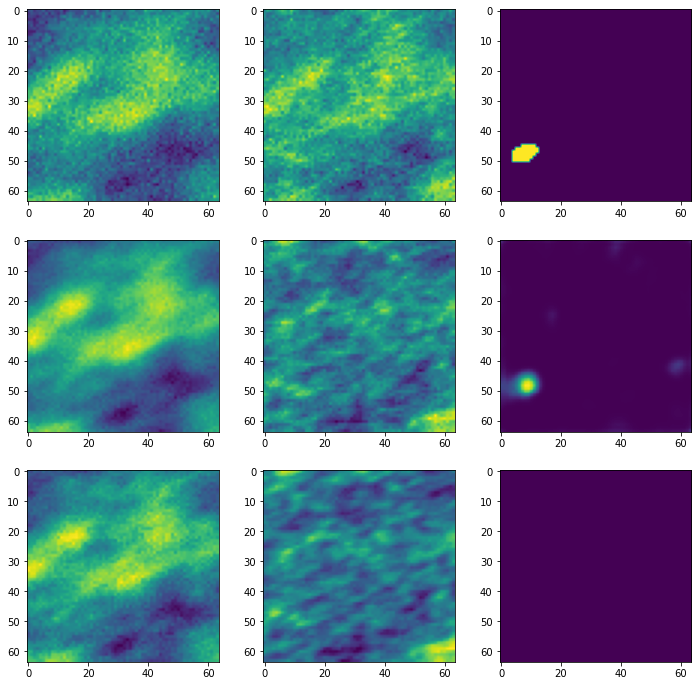

In [15]:
check_gen(test_gen, model)

In [16]:
model.save_weights('/home/rt2122/Models/planck_z/f8d0.8.ep150.h5')